In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
z = 1.96  # 95% CI

# rnn_log = '../data/pendulum_partial_norm_rnn_06-05-2022_13-28-32/2/train.log'
rnn_log = '../data/pendulum_partial_norm_rnn_07-05-2022_11-57-10/2/train.log'

# rnntilde_log = '../data/pendulum_partial_norm_rnn_proj_06-05-2022_18-56-58/2/train.log'
rnntilde_log = '../data/pendulum_partial_norm_rnn_proj_06-05-2022_19-09-42/2/train.log'

In [29]:
rnn_df = pd.read_csv(rnn_log, sep='\t', header=0)
rnn_df.head()

,"2022-05-07 11:57:10,649",INFO,Iteration,TotalSeconds,SecondsThisIter,MeanReward,StdDevReward,MinReward,MaxReward,MeanEpLength,StdDevEpLength,MinEpLength,MaxEpLength,NumEp,TimeStepsThisIter,TotalTimeSteps,ActorLoss,CriticLoss
0,"2022-05-07 11:57:17,766",INFO,0,7.1150,7.1150,10.8283,11.3214,-8.2,40.3,51.5,11.8,32,83,117,6027,6027,-0.00,1.00
1,"2022-05-07 11:57:25,445",INFO,1,14.7947,7.6783,15.2195,16.0307,-6.5,98.7,55.6,16.6,33,144,108,6006,12033,-0.00,1.00
2,"2022-05-07 11:57:34,534",INFO,2,23.8835,9.0875,14.1345,11.6479,-5.7,56.9,54.6,12.0,36,99,110,6008,18041,-0.01,0.98
3,"2022-05-07 11:57:42,994",INFO,3,32.3435,8.4585,13.0382,13.8415,-8.8,63.4,53.7,14.2,32,108,113,6065,24106,-0.00,0.97
4,"2022-05-07 11:57:50,325",INFO,4,39.6747,7.3299,13.2776,13.7917,-9.0,75.9,53.6,14.1,33,119,113,6053,30159,-0.01,0.95


In [30]:
rnnt_df = pd.read_csv(rnntilde_log, sep='\t', header=0)
rnnt_df.head()

,"2022-05-06 19:09:42,566",INFO,Iteration,TotalSeconds,SecondsThisIter,MeanReward,StdDevReward,MinReward,MaxReward,MeanEpLength,StdDevEpLength,MinEpLength,MaxEpLength,NumEp,TimeStepsThisIter,TotalTimeSteps,ActorLoss,CriticLoss
0,"2022-05-06 19:09:51,338",INFO,0,8.7699,8.7699,15.8712,14.0750,-3.5,64.1,55.9,14.5,35,105,108,6038,6038,-0.01,1.06
1,"2022-05-06 19:10:02,189",INFO,1,19.6213,10.8499,15.6634,17.6478,-7.7,107.0,55.8,17.9,34,150,108,6022,12060,-0.03,1.01
2,"2022-05-06 19:10:14,094",INFO,2,31.5259,11.9032,44.4339,27.0083,4.2,158.3,98.2,28.8,62,201,62,6089,18149,-0.01,1.01
3,"2022-05-06 19:10:27,344",INFO,3,44.7762,13.2493,178.9460,7.1996,162.1,190.1,201.0,0.0,201,201,30,6030,24179,-0.01,1.00
4,"2022-05-06 19:10:42,205",INFO,4,59.6372,14.8602,64.0914,61.6154,-12.1,188.0,161.2,36.2,100,201,38,6125,30304,0.02,1.01


In [31]:
rnn_df['CIReward'] = rnn_df.StdDevReward / np.sqrt(rnn_df.NumEp)
rnn_df['CIEpLength'] = rnn_df.StdDevEpLength / np.sqrt(rnn_df.NumEp)
rnn_df.head()

,"2022-05-07 11:57:10,649",INFO,Iteration,TotalSeconds,SecondsThisIter,MeanReward,StdDevReward,MinReward,MaxReward,MeanEpLength,StdDevEpLength,MinEpLength,MaxEpLength,NumEp,TimeStepsThisIter,TotalTimeSteps,ActorLoss,CriticLoss,CIReward,CIEpLength
0,"2022-05-07 11:57:17,766",INFO,0,7.1150,7.1150,10.8283,11.3214,-8.2,40.3,51.5,11.8,32,83,117,6027,6027,-0.00,1.00,1.046664,1.090910
1,"2022-05-07 11:57:25,445",INFO,1,14.7947,7.6783,15.2195,16.0307,-6.5,98.7,55.6,16.6,33,144,108,6006,12033,-0.00,1.00,1.542555,1.597336
2,"2022-05-07 11:57:34,534",INFO,2,23.8835,9.0875,14.1345,11.6479,-5.7,56.9,54.6,12.0,36,99,110,6008,18041,-0.01,0.98,1.110584,1.144155
3,"2022-05-07 11:57:42,994",INFO,3,32.3435,8.4585,13.0382,13.8415,-8.8,63.4,53.7,14.2,32,108,113,6065,24106,-0.00,0.97,1.302099,1.335824
4,"2022-05-07 11:57:50,325",INFO,4,39.6747,7.3299,13.2776,13.7917,-9.0,75.9,53.6,14.1,33,119,113,6053,30159,-0.01,0.95,1.297414,1.326416


In [32]:
rnnt_df['CIReward'] = rnnt_df.StdDevReward / np.sqrt(rnnt_df.NumEp)
rnnt_df['CIEpLength'] = rnnt_df.StdDevEpLength / np.sqrt(rnnt_df.NumEp)
rnnt_df.head()

,"2022-05-06 19:09:42,566",INFO,Iteration,TotalSeconds,SecondsThisIter,MeanReward,StdDevReward,MinReward,MaxReward,MeanEpLength,StdDevEpLength,MinEpLength,MaxEpLength,NumEp,TimeStepsThisIter,TotalTimeSteps,ActorLoss,CriticLoss,CIReward,CIEpLength
0,"2022-05-06 19:09:51,338",INFO,0,8.7699,8.7699,15.8712,14.0750,-3.5,64.1,55.9,14.5,35,105,108,6038,6038,-0.01,1.06,1.354368,1.395263
1,"2022-05-06 19:10:02,189",INFO,1,19.6213,10.8499,15.6634,17.6478,-7.7,107.0,55.8,17.9,34,150,108,6022,12060,-0.03,1.01,1.698160,1.722428
2,"2022-05-06 19:10:14,094",INFO,2,31.5259,11.9032,44.4339,27.0083,4.2,158.3,98.2,28.8,62,201,62,6089,18149,-0.01,1.01,3.430058,3.657604
3,"2022-05-06 19:10:27,344",INFO,3,44.7762,13.2493,178.9460,7.1996,162.1,190.1,201.0,0.0,201,201,30,6030,24179,-0.01,1.00,1.314461,0.000000
4,"2022-05-06 19:10:42,205",INFO,4,59.6372,14.8602,64.0914,61.6154,-12.1,188.0,161.2,36.2,100,201,38,6125,30304,0.02,1.01,9.995338,5.872415


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


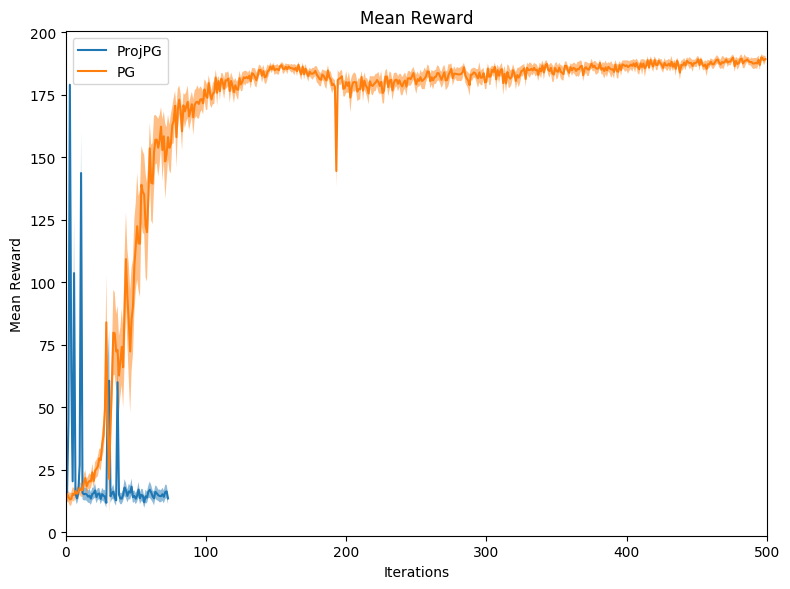

In [33]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(rnnt_df.Iteration, rnnt_df.MeanReward, label='ProjPG')
plt.fill_between(rnnt_df.Iteration, rnnt_df.MeanReward - z * rnnt_df.CIReward, rnnt_df.MeanReward + z * rnnt_df.CIReward, alpha=.5)

plt.plot(rnn_df.Iteration, rnn_df.MeanReward, label='PG')
plt.fill_between(rnn_df.Iteration, rnn_df.MeanReward - z * rnn_df.CIReward, rnn_df.MeanReward + z * rnn_df.CIReward, alpha=.5)

plt.title('Mean Reward')
plt.xlabel('Iterations')
plt.ylabel('Mean Reward')

plt.xlim((0, 500))

plt.legend()

plt.tight_layout()

plt.show()

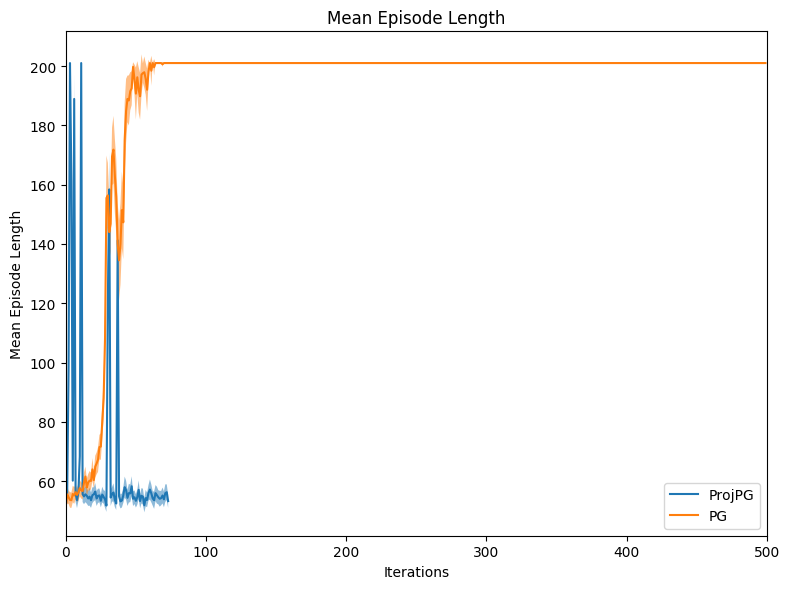

In [34]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(rnnt_df.Iteration, rnnt_df.MeanEpLength, label='ProjPG')
plt.fill_between(rnnt_df.Iteration, rnnt_df.MeanEpLength - z * rnnt_df.CIEpLength, rnnt_df.MeanEpLength + z * rnnt_df.CIEpLength, alpha=.5)

plt.plot(rnn_df.Iteration, rnn_df.MeanEpLength, label='PG')
plt.fill_between(rnn_df.Iteration, rnn_df.MeanEpLength - z * rnn_df.CIEpLength, rnn_df.MeanEpLength + z * rnn_df.CIEpLength, alpha=.5)

plt.title('Mean Episode Length')
plt.xlabel('Iterations')
plt.ylabel('Mean Episode Length')

plt.xlim((0, 500))

plt.legend()

plt.tight_layout()

plt.show()